## Check if the packages are installed and all function parameters

In [60]:
import importlib.util
import sys
import subprocess

def check_installation_and_install(package_name):
    spec = importlib.util.find_spec(package_name)
    if spec is None:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
    else:
        print(package_name + " is installed");

def save_cleaned_csv(dataframe,filename):
    os.makedirs("Cleaned_Data", exist_ok=True)  # Ensures directory exists
    dataframe.to_csv(f"Cleaned_Data/{filename}.csv")

check_installation_and_install("pandas")
check_installation_and_install("matplotlib")
check_installation_and_install("numpy")
check_installation_and_install("seaborn")
check_installation_and_install("scikit-learn")

pandas is installed
matplotlib is installed
numpy is installed
seaborn is installed


## Import Packages

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Insert Dataset to clean and preprocess

In [73]:
file_directory = "../dataset"

office_1_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part1.csv"))
office_2_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part2.csv"))
small_apartment_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part3.csv"))
small_workshop_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part4.csv"))
kitchen_livingroom_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part5.csv"))
bed_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part6.csv"))
boiler_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part7.csv"))

df_array = [office_1_df,office_2_df,small_apartment_df,small_workshop_df,kitchen_livingroom_df,bed_room_df,boiler_room_df]

## Check the data description (1 statisfy as others contains the same type of data)

In [74]:
office_1_df.describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.494667,3.826510,745.69750,8185.083667,11436.452833,9793.886500,72.221333,9842.208167,1317.649333,615.575500,...,257.887167,267.274833,248.486333,224.114167,239.009333,241.540000,253.234333,240.372500,254.194167,89.813333
std,0.500013,2.375949,4.90051,5384.003078,6235.459692,5362.053633,29.081334,4866.688927,580.461607,308.143783,...,151.244824,154.786864,131.708557,114.445401,128.869389,133.199023,175.999174,135.245002,146.977696,144.770797
min,0.000000,0.060000,712.00000,12.000000,208.000000,413.000000,28.000000,0.000000,412.000000,192.000000,...,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,4.000000,5.000000,5.000000,0.000000
25%,0.000000,1.810000,744.00000,3683.500000,5410.750000,4824.750000,56.000000,6843.000000,962.000000,317.000000,...,162.000000,161.750000,162.000000,146.000000,156.000000,156.000000,154.000000,151.000000,159.000000,0.000000
50%,0.000000,3.440000,746.00000,7117.000000,12299.000000,10285.500000,68.000000,9974.000000,1134.000000,509.000000,...,232.000000,244.000000,234.000000,216.000000,226.000000,230.000000,228.000000,222.000000,230.000000,0.000000
75%,1.000000,5.370000,748.00000,12334.500000,17341.250000,14414.000000,80.000000,12457.250000,1498.250000,1024.000000,...,311.000000,339.000000,301.000000,272.000000,288.250000,292.000000,296.000000,292.000000,310.000000,256.000000
max,1.000000,12.490000,838.00000,20456.000000,20624.000000,20399.000000,316.000000,31545.000000,5077.000000,1025.000000,...,1565.000000,1269.000000,1172.000000,1113.000000,1136.000000,1461.000000,2153.000000,1228.000000,1467.000000,1024.000000


## Check Any Missing Value

In [75]:
def check_missing_value(df_array):
    for i, df in enumerate(df_array, start=1):
        print(f"DataFrame {i} Missing Values:")
        print(df.isnull().sum().unique())
        print("-" * 30)

check_missing_value(df_array)

DataFrame 1 Missing Values:
[0]
------------------------------
DataFrame 2 Missing Values:
[0]
------------------------------
DataFrame 3 Missing Values:
[0]
------------------------------
DataFrame 4 Missing Values:
[0]
------------------------------
DataFrame 5 Missing Values:
[0]
------------------------------
DataFrame 6 Missing Values:
[0]
------------------------------
DataFrame 7 Missing Values:
[0]
------------------------------


## Check for any duplicated values

In [76]:
def check_duplicated_values(df_array):
      for i, df in enumerate(df_array, start=1):
        duplicate = df[df.duplicated()]

        if not duplicate.empty:
            print("Duplicate Rows :")
            print(duplicate)
            print("-" * 30)
        else:
            print("No duplicate rows found")
            print("-" * 30)

check_duplicated_values(df_array)

No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------


## Removal of Unnecessary Columns

In [77]:
#Remove Columns that is not useful
def clean_column(df_array, columns_to_drop):
    for i in range(len(df_array)):
        df_array[i] = df_array[i].drop(columns=columns_to_drop, axis=1)
    return df_array


clean_column(df_array,['CH','PREAM_LEN','BITRATE','PRFR'])
df_array[0].describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.494667,3.826510,745.69750,8185.083667,11436.452833,9793.886500,72.221333,9842.208167,1317.649333,615.575500,...,257.887167,267.274833,248.486333,224.114167,239.009333,241.540000,253.234333,240.372500,254.194167,89.813333
std,0.500013,2.375949,4.90051,5384.003078,6235.459692,5362.053633,29.081334,4866.688927,580.461607,308.143783,...,151.244824,154.786864,131.708557,114.445401,128.869389,133.199023,175.999174,135.245002,146.977696,144.770797
min,0.000000,0.060000,712.00000,12.000000,208.000000,413.000000,28.000000,0.000000,412.000000,192.000000,...,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,4.000000,5.000000,5.000000,0.000000
25%,0.000000,1.810000,744.00000,3683.500000,5410.750000,4824.750000,56.000000,6843.000000,962.000000,317.000000,...,162.000000,161.750000,162.000000,146.000000,156.000000,156.000000,154.000000,151.000000,159.000000,0.000000
50%,0.000000,3.440000,746.00000,7117.000000,12299.000000,10285.500000,68.000000,9974.000000,1134.000000,509.000000,...,232.000000,244.000000,234.000000,216.000000,226.000000,230.000000,228.000000,222.000000,230.000000,0.000000
75%,1.000000,5.370000,748.00000,12334.500000,17341.250000,14414.000000,80.000000,12457.250000,1498.250000,1024.000000,...,311.000000,339.000000,301.000000,272.000000,288.250000,292.000000,296.000000,292.000000,310.000000,256.000000
max,1.000000,12.490000,838.00000,20456.000000,20624.000000,20399.000000,316.000000,31545.000000,5077.000000,1025.000000,...,1565.000000,1269.000000,1172.000000,1113.000000,1136.000000,1461.000000,2153.000000,1228.000000,1467.000000,1024.000000


## Checking Covariance (How Two Variables Vary Together)

In [78]:
dataset_names = [
    "Office 1", "Office 2", "Small Apartment", "Small Workshop",
    "Kitchen Living Room", "Bedroom", "Boiler Room"
]


def get_covariance(df_array):
    for idx,df in enumerate(df_array):
        cov_matrix = df.cov()
        print(f"{dataset_names[idx]}")
        print(cov_matrix)
        print("-" * 30)

get_covariance(df_array)

Office 1
                NLOS        RANGE        FP_IDX       FP_AMP1       FP_AMP2  \
NLOS        0.250013     0.549595     -0.684477 -1.203023e+03 -1.637706e+03   
RANGE       0.549595     5.645135     -3.166990 -5.710526e+03 -7.161218e+03   
FP_IDX     -0.684477    -3.166990     24.014996  7.382428e+03  1.227536e+04   
FP_AMP1 -1203.023058 -5710.525726   7382.427880  2.898749e+07  1.979772e+07   
FP_AMP2 -1637.706453 -7161.218243  12275.355875  1.979772e+07  3.888096e+07   
...              ...          ...           ...           ...           ...   
CIR1011    12.316933    44.548593    -23.250858 -8.285532e+04 -1.140030e+05   
CIR1012     8.167611    37.143938     -1.428686 -6.916256e+04 -9.887575e+04   
CIR1013    11.901220    57.141990    -40.316705 -9.563093e+04 -1.162356e+05   
CIR1014    16.478199    55.427301    -31.400998 -1.259295e+05 -1.678243e+05   
CIR1015     5.749296    29.337645     16.675313 -4.042432e+04 -4.872770e+04   

              FP_AMP3   STDEV_NOISE       

## Checking Correlation (Strength & Direction of Relationships)

In [81]:
def get_correlation(df_array):
    for idx,df in enumerate(df_array):
        corr_matrix = df.corr()
        print(f"{dataset_names[idx]}")
        print(corr_matrix)
        print("-" * 30)

get_correlation(df_array)

Office 1
             NLOS     RANGE    FP_IDX   FP_AMP1   FP_AMP2   FP_AMP3  \
NLOS     1.000000  0.462619 -0.279342 -0.446876 -0.525274 -0.516933   
RANGE    0.462619  1.000000 -0.272000 -0.446410 -0.483372 -0.461472   
FP_IDX  -0.279342 -0.272000  1.000000  0.279803  0.401721  0.414102   
FP_AMP1 -0.446876 -0.446410  0.279803  1.000000  0.589714  0.451004   
FP_AMP2 -0.525274 -0.483372  0.401721  0.589714  1.000000  0.884499   
...           ...       ...       ...       ...       ...       ...   
CIR1011  0.184935  0.140765 -0.035620 -0.115535 -0.137261 -0.125168   
CIR1012  0.092812  0.088826 -0.001656 -0.072989 -0.090097 -0.077127   
CIR1013  0.175990  0.177827 -0.060831 -0.131332 -0.137832 -0.128606   
CIR1014  0.224221  0.158721 -0.043596 -0.159137 -0.183120 -0.163625   
CIR1015  0.079424  0.085292  0.023505 -0.051863 -0.053979 -0.036502   

         STDEV_NOISE   CIR_PWR  MAX_NOISE    RXPACC  ...   CIR1006   CIR1007  \
NLOS        0.144111 -0.388797  -0.211995  0.734987  ...  

## Feature Importance

In [83]:
def random_forest(df_array, n_features):    
    for idx, each_df in enumerate(df_array):
        # Separate features and target variable
        X = each_df.drop('NLOS', axis=1)
        y = each_df['NLOS']
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit RandomForestClassifier to determine feature importance
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        importances = clf.feature_importances_
        feature_names = X.columns

        feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
        feature_imp_df = feature_imp_df.head(n_features)  # Keep only top 'n_features'

        # Select the top 'n_features' features
        selected_features = feature_imp_df['Feature'].tolist()

        # Evaluate accuracy with 50, 100, and 200 features
        # for top_n in [50, 100, 200]:
        #     if top_n <= len(selected_features):  # Make sure we don't exceed available features
        #         top_n_features = selected_features[:top_n]
        #         X_train_selected = X_train[top_n_features]
        #         X_test_selected = X_test[top_n_features]

        #         clf = RandomForestClassifier(n_estimators=100, random_state=42)
        #         clf.fit(X_train_selected, y_train)

        #         y_pred = clf.predict(X_test_selected)
        #         acc = accuracy_score(y_test, y_pred)
        #         print(f"Using {top_n} features → Accuracy: {acc:.4f}")

        ## After finding out the accuracy score for the most important features is 50 

        df_array[idx] = each_df[selected_features + ['NLOS']]


# Call the function with your dataset and desired number of features
random_forest(df_array, 50)


## Check for Outliers

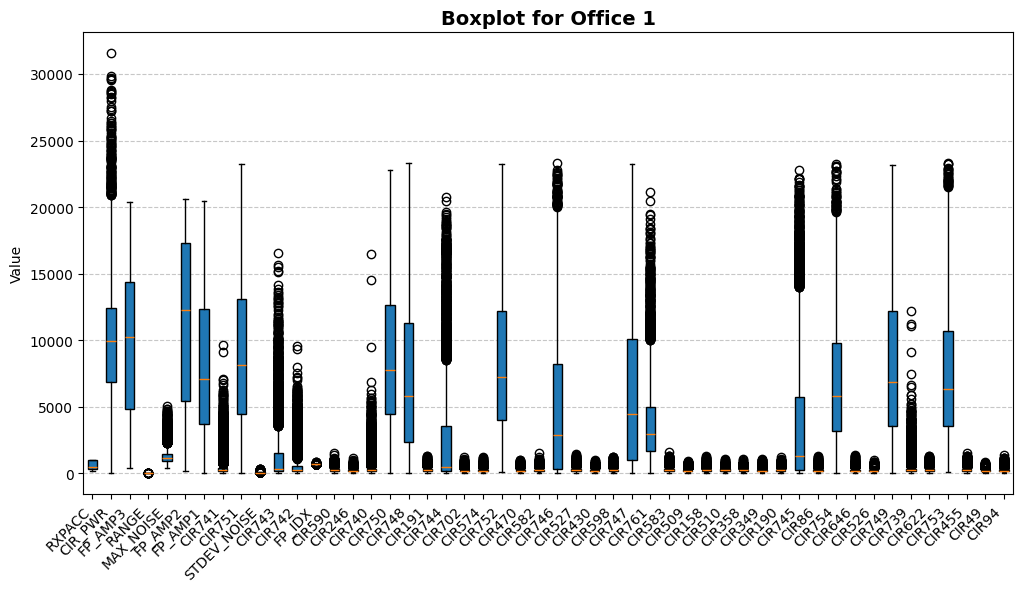

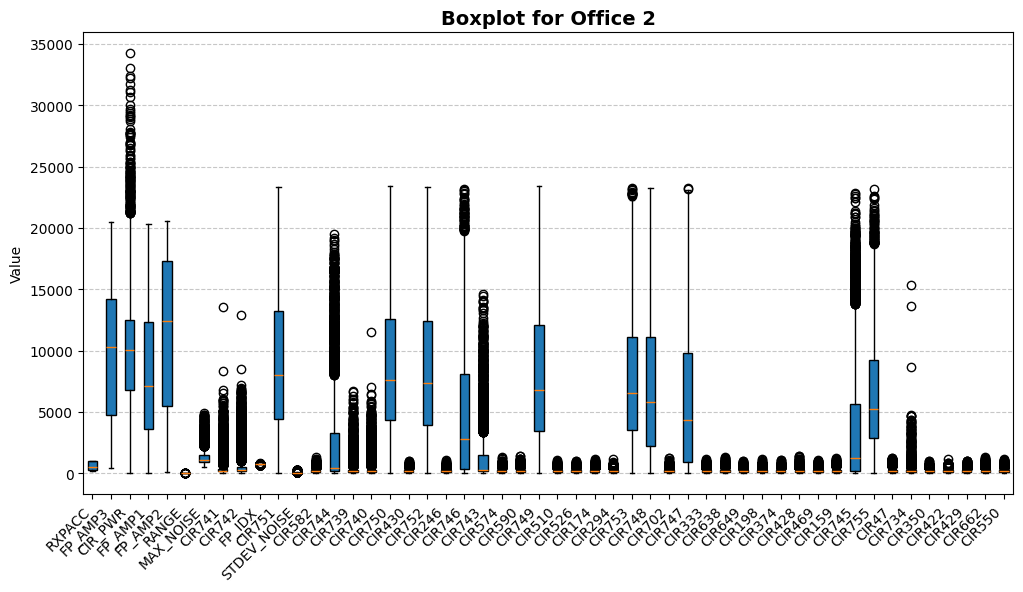

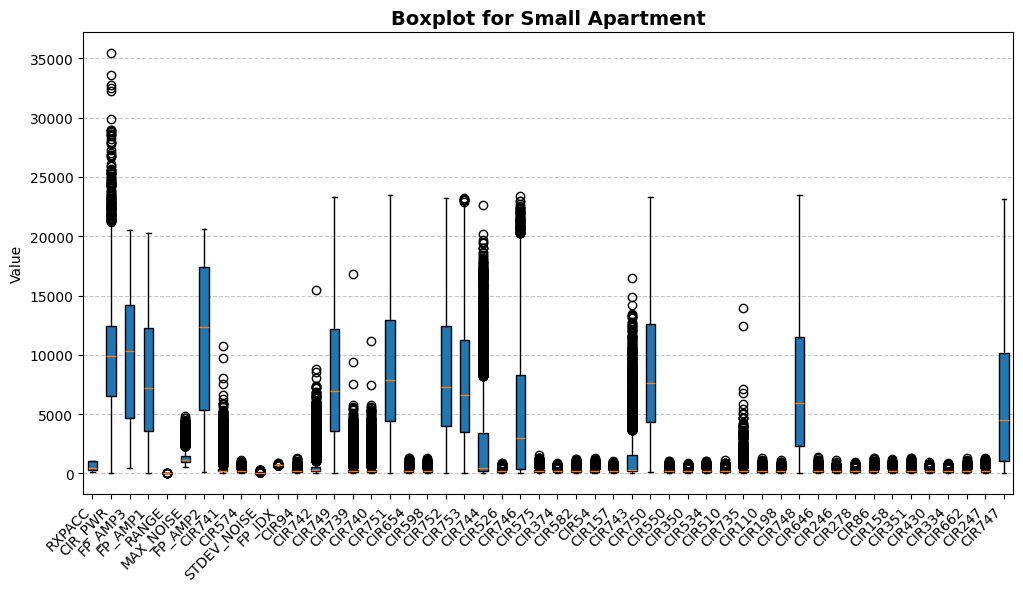

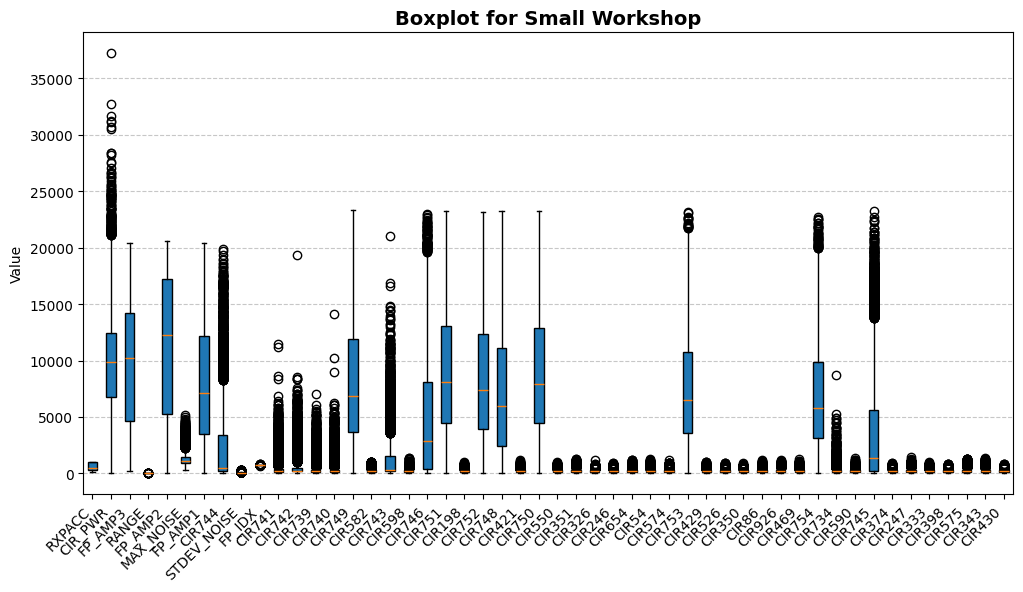

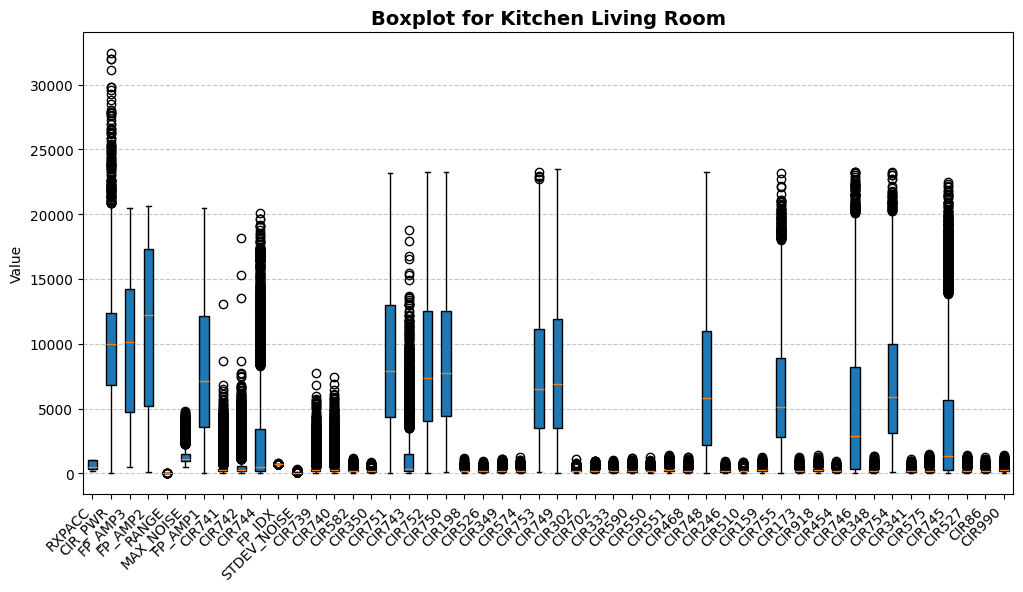

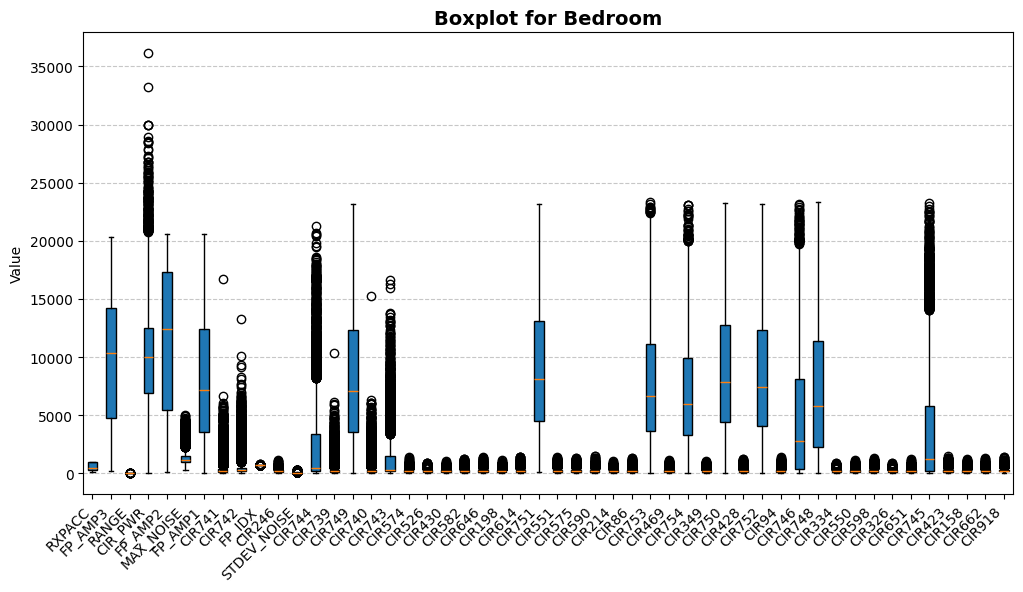

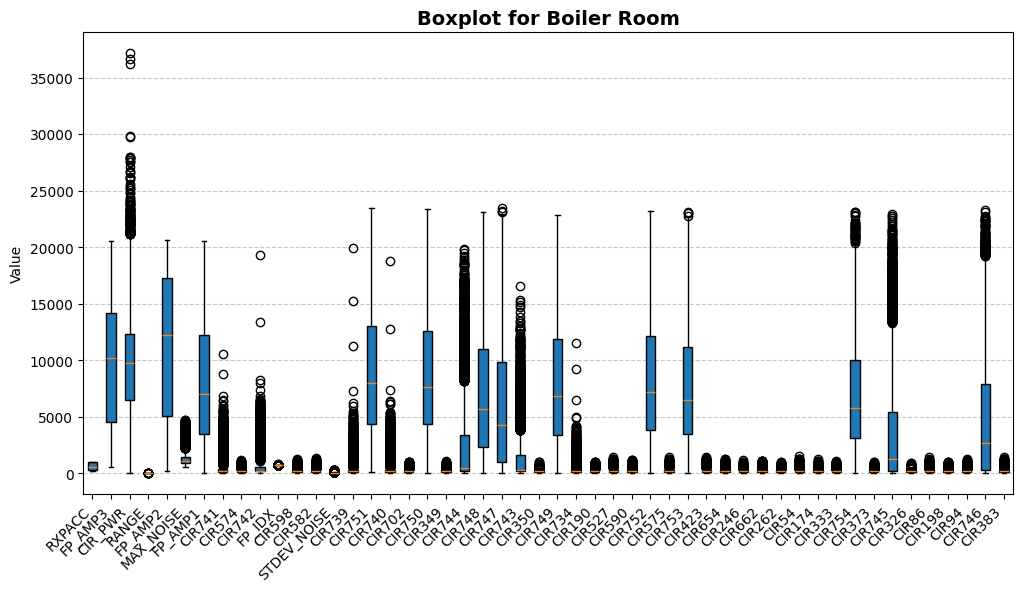

In [84]:
# columns_to_check = [
#     "RANGE", "FP_IDX", "FP_AMP1", "FP_AMP2", "FP_AMP3",
#     "STDEV_NOISE", "CIR_PWR", "MAX_NOISE", "RXPACC",
#     "FRAME_LEN"
# ]

for idx, df in enumerate(df_array): #Loop through each columns inside each df
    columns_to_check = df.columns[:-1] #Get all columns except the last column
    plt.figure(figsize=(12, 6)) #Create a 12x6 figure for the plot
    plt.boxplot(df[columns_to_check], vert=True, patch_artist=True) #Create a boxplot for columns 


    plt.xticks(range(1, len(columns_to_check) + 1), columns_to_check, rotation=45, ha="right") #Configuring x label
    plt.title(f"Boxplot for {dataset_names[idx]}", fontsize=14, fontweight="bold") #Add a title
    plt.ylabel("Value") #Add y label
    plt.grid(axis='y', linestyle='--', alpha=0.7) #Add grid to the plot

    plt.show()

## Remove Outliers

In [86]:
#Outliers are removed using Z Score
def calculate_mean(column):
    return sum(column) / len(column)

def calculate_std(column, mean):
    variance = sum((x - mean) ** 2 for x in column) / len(column) #Average Squared difference from the mean
    return variance ** 0.5 

def remove_outliers(df, columns, threshold=3):
    for col in columns:
        if col in df.columns:
            column_data = df[col].dropna().tolist() #Converting to list

            mean = calculate_mean(column_data) #Calculate mean for column
            std = calculate_std(column_data, mean) #Calculate STD for column

            #Filter rows where absolute Z score is less than threshold
            #Rows that has zScore greater or equal to threshold are removed as they will be considered outlier
            df = df[[abs((x - mean)/ std) < threshold if not pd.isna(x) else False for x in df[col]]] 
            
    return df

df_array = [remove_outliers(df, columns_to_check) for df in df_array]

for idx, df in enumerate(df_array):
    print(f"{dataset_names[idx]}:")
    print(f" - Rows after outlier removal: {df.shape[0]}\n")

Office 1:
 - Rows after outlier removal: 4445

Office 2:
 - Rows after outlier removal: 4479

Small Apartment:
 - Rows after outlier removal: 4533

Small Workshop:
 - Rows after outlier removal: 4393

Kitchen Living Room:
 - Rows after outlier removal: 4429

Bedroom:
 - Rows after outlier removal: 4414

Boiler Room:
 - Rows after outlier removal: 4129



## Check after outliners removal 

In [87]:
df_array[0].describe()

,RXPACC,CIR_PWR,FP_AMP3,RANGE,MAX_NOISE,FP_AMP2,FP_AMP1,CIR741,CIR751,STDEV_NOISE,...,CIR646,CIR526,CIR749,CIR739,CIR622,CIR753,CIR455,CIR49,CIR94,NLOS
count,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,...,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000
mean,555.766704,10299.588526,10501.106187,3.500002,1251.274016,12283.468391,8760.967829,255.913836,9764.690664,66.179528,...,222.272216,224.730259,8460.451294,232.900112,229.557930,8296.390101,226.685714,211.649269,220.111586,0.423172
std,289.751410,4312.259394,5103.249690,2.169015,461.408565,5903.353176,5319.749352,200.393900,5284.424300,18.011327,...,111.847852,109.092903,5622.748289,117.278676,112.259027,5125.282852,115.620764,96.635922,105.053652,0.494118
min,192.000000,0.000000,413.000000,0.060000,412.000000,214.000000,12.000000,5.000000,47.000000,28.000000,...,3.000000,5.000000,7.000000,3.000000,5.000000,111.000000,6.000000,3.000000,1.000000,0.000000
25%,303.000000,7841.000000,6018.000000,1.640000,934.000000,6869.000000,4321.000000,152.000000,5391.000000,52.000000,...,143.000000,147.000000,3769.000000,156.000000,150.000000,4220.000000,143.000000,146.000000,147.000000,0.000000
50%,432.000000,10311.000000,11045.000000,3.140000,1118.000000,13903.000000,7942.000000,221.000000,9224.000000,64.000000,...,213.000000,215.000000,7425.000000,226.000000,218.000000,7269.000000,222.000000,212.000000,214.000000,0.000000
75%,838.000000,12629.000000,14883.000000,4.890000,1471.000000,17533.000000,12977.000000,288.000000,14189.000000,76.000000,...,275.000000,277.000000,12978.000000,286.000000,284.000000,11751.000000,286.000000,262.000000,273.000000,1.000000
max,1025.000000,24308.000000,20399.000000,10.910000,3060.000000,20503.000000,20323.000000,2566.000000,23195.000000,124.000000,...,759.000000,740.000000,23204.000000,1225.000000,691.000000,23263.000000,779.000000,691.000000,549.000000,1.000000


## Check valid data types 

In [88]:
def check_data_types(df_array):
    for idx, df in enumerate(df_array):
        print(f"{dataset_names[idx]}: {df.dtypes.unique()}")

check_data_types(df_array)

Office 1: [dtype('float64')]
Office 2: [dtype('float64')]
Small Apartment: [dtype('float64')]
Small Workshop: [dtype('float64')]
Kitchen Living Room: [dtype('float64')]
Bedroom: [dtype('float64')]
Boiler Room: [dtype('float64')]


## Do Principal Component Analysis 


Office 1

Transformed DataFrame after PCA:
             RXPACC       CIR_PWR       FP_AMP3         RANGE     MAX_NOISE  \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean  -1.247127e-16 -2.131841e-18  1.577563e-16  3.197762e-17  5.542788e-17   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00   
min   -1.255328e+00 -2.413668e+00 -1.984849e+00 -1.556762e+00 -1.808236e+00   
25%   -8.692320e-01 -5.597590e-01 -8.779710e-01 -8.573464e-01 -7.103739e-01   
50%   -4.274829e-01  2.344050e-04  1.066609e-01 -1.533295e-01 -2.854647e-01   
75%    9.081992e-01  5.475700e-01  8.511100e-01  6.427158e-01  4.672933e-01   
max    1.642129e+00  3.284248e+00  1.930561e+00  3.417371e+00  3.903235e+00   

            FP_AMP2       FP_AMP1        CIR741        CIR751   STDEV_NOISE  \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean  -4.263683e-17 -2.345026e-17 -4.849939e-17  1.428334e-16  2.686120e-16   
std    

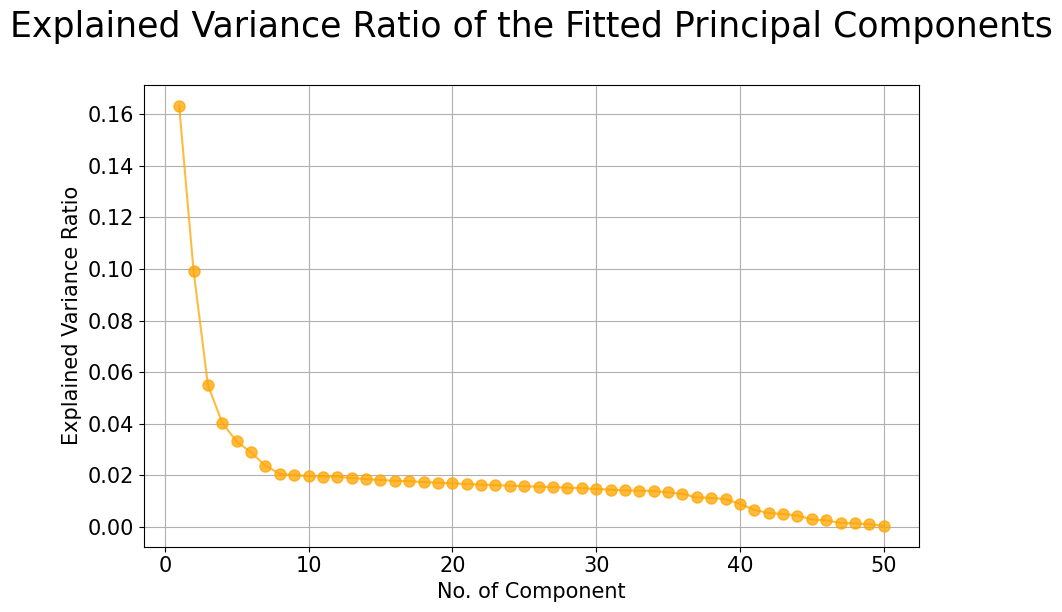


Office 2

Transformed DataFrame after PCA:
             RXPACC       FP_AMP3       CIR_PWR       FP_AMP1       FP_AMP2  \
count  3.359000e+03  3.359000e+03  3.359000e+03  3.359000e+03  3.359000e+03   
mean  -5.499884e-17 -3.754729e-17  2.020150e-16 -2.459083e-17  9.730564e-17   
std    1.000149e+00  1.000149e+00  1.000149e+00  1.000149e+00  1.000149e+00   
min   -1.161212e+00 -1.949503e+00 -2.330539e+00 -1.616953e+00 -2.066862e+00   
25%   -8.724846e-01 -8.679227e-01 -5.604960e-01 -8.439465e-01 -9.156882e-01   
50%   -4.281555e-01  1.312830e-01  1.414895e-02 -1.527778e-01  2.886972e-01   
75%    9.549704e-01  8.243867e-01  5.179286e-01  7.930905e-01  8.789427e-01   
max    1.608497e+00  1.946072e+00  3.323695e+00  2.158912e+00  1.402927e+00   

              RANGE     MAX_NOISE        CIR741        CIR742        FP_IDX  \
count  3.359000e+03  3.359000e+03  3.359000e+03  3.359000e+03  3.359000e+03   
mean   5.182583e-17  1.015363e-16 -1.374971e-17  3.384544e-17  1.672071e-14   
std    

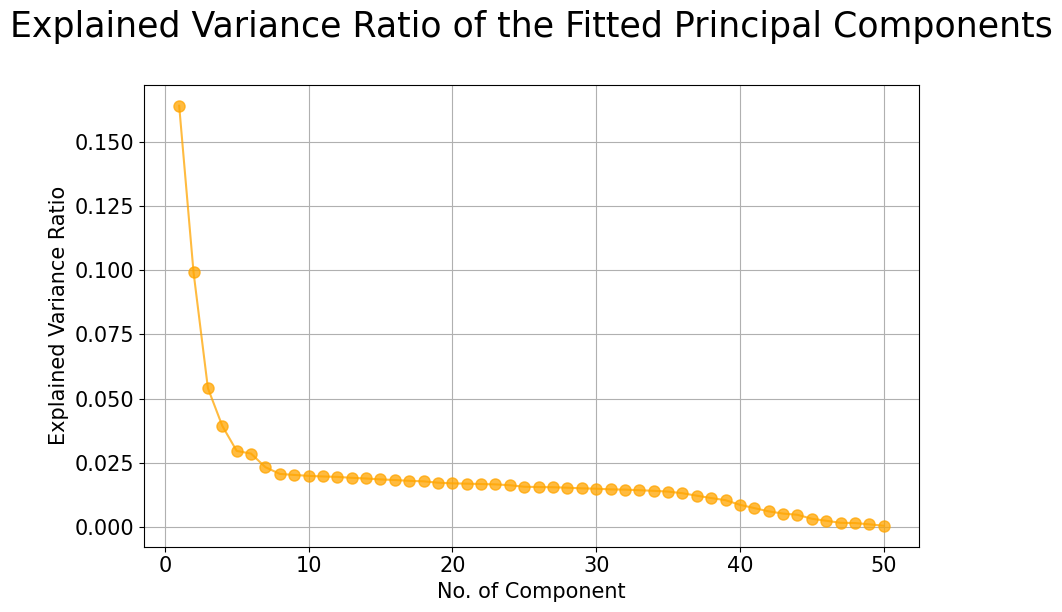


Small Apartment

Transformed DataFrame after PCA:
             RXPACC       CIR_PWR       FP_AMP3       FP_AMP1         RANGE  \
count  3.399000e+03  3.399000e+03  3.399000e+03  3.399000e+03  3.399000e+03   
mean   1.541704e-16 -2.613058e-17  1.128841e-16 -1.578287e-16  2.090446e-17   
std    1.000147e+00  1.000147e+00  1.000147e+00  1.000147e+00  1.000147e+00   
min   -1.451126e+00 -2.374088e+00 -1.970596e+00 -1.656147e+00 -1.545791e+00   
25%   -8.654667e-01 -5.644965e-01 -8.812966e-01 -8.486094e-01 -8.442287e-01   
50%   -4.297083e-01  1.895397e-02  1.533457e-01 -1.108804e-01 -1.888217e-01   
75%    8.845391e-01  5.308795e-01  8.006508e-01  8.297775e-01  6.904391e-01   
max    1.658446e+00  3.256748e+00  1.886004e+00  2.108526e+00  3.374377e+00   

          MAX_NOISE       FP_AMP2        CIR741        CIR574   STDEV_NOISE  \
count  3.399000e+03  3.399000e+03  3.399000e+03  3.399000e+03  3.399000e+03   
mean  -2.090446e-16  1.149746e-17 -6.793951e-17  1.249042e-16  5.853250e-17   


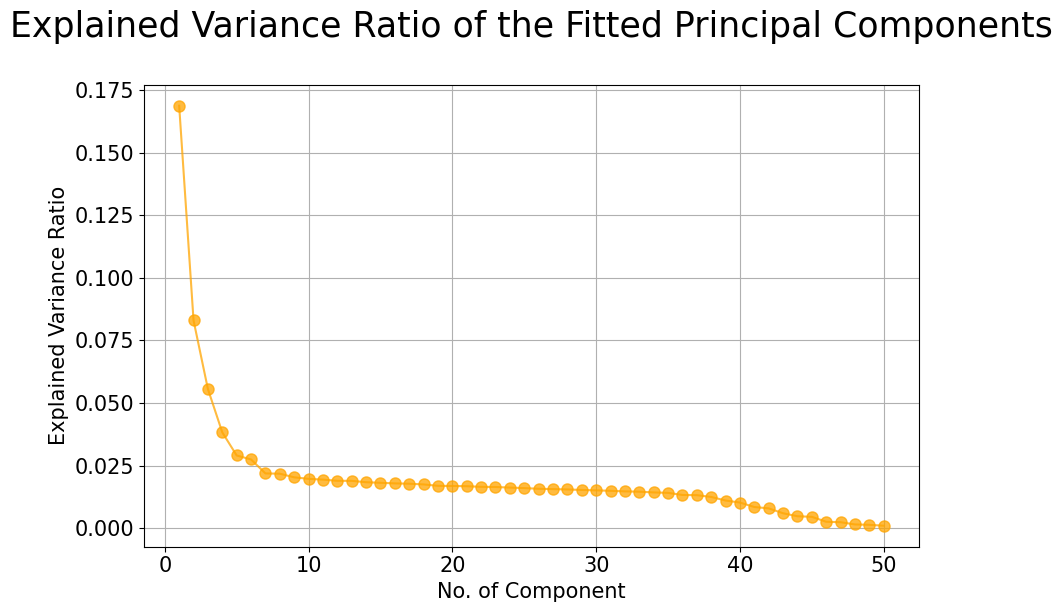


Small Workshop

Transformed DataFrame after PCA:
             RXPACC       CIR_PWR       FP_AMP3         RANGE       FP_AMP2  \
count  3.294000e+03  3.294000e+03  3.294000e+03  3.294000e+03  3.294000e+03   
mean  -1.779592e-16 -2.912060e-17  8.196911e-17 -1.531528e-16  5.824121e-17   
std    1.000152e+00  1.000152e+00  1.000152e+00  1.000152e+00  1.000152e+00   
min   -1.269706e+00 -2.328739e+00 -1.985528e+00 -1.604267e+00 -2.087473e+00   
25%   -8.711356e-01 -5.601350e-01 -8.618992e-01 -8.579319e-01 -9.117551e-01   
50%   -4.020217e-01 -2.394677e-02  1.290285e-01 -1.608833e-01  2.837812e-01   
75%    8.562972e-01  5.212507e-01  8.208630e-01  7.051469e-01  8.772751e-01   
max    1.777771e+00  3.182663e+00  1.905389e+00  3.347830e+00  1.403658e+00   

          MAX_NOISE       FP_AMP1        CIR744   STDEV_NOISE        FP_IDX  \
count  3.294000e+03  3.294000e+03  3.294000e+03  3.294000e+03  3.294000e+03   
mean  -1.461423e-16 -7.064443e-17  2.426717e-17  1.439852e-16 -2.206964e-14   
s

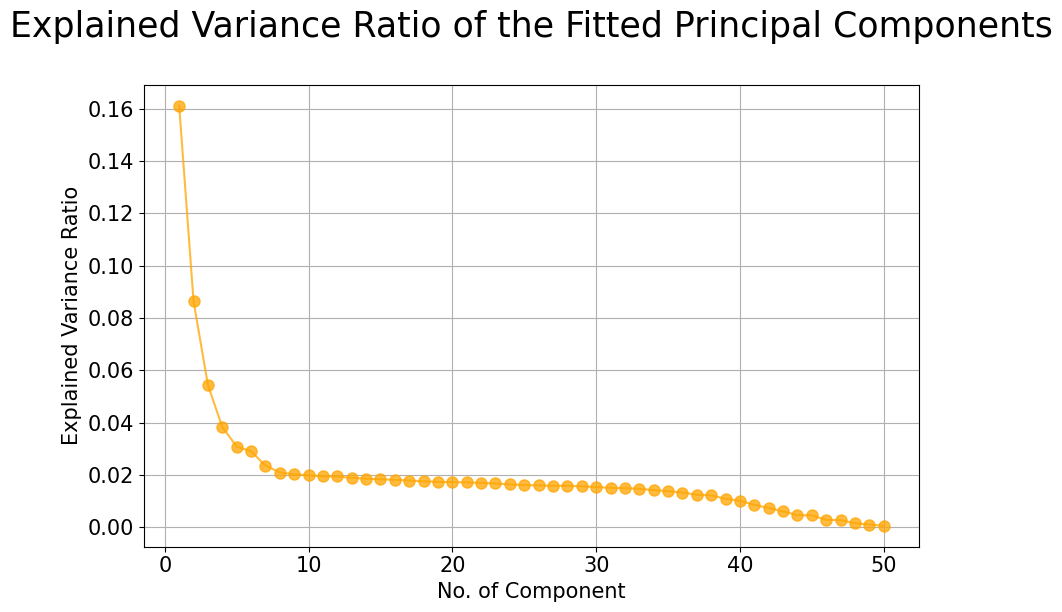


Kitchen Living Room

Transformed DataFrame after PCA:
             RXPACC       CIR_PWR       FP_AMP3       FP_AMP2         RANGE  \
count  3.321000e+03  3.321000e+03  3.321000e+03  3.321000e+03  3.321000e+03   
mean   1.936288e-16 -6.846542e-17 -1.636752e-16  1.283727e-17 -1.155354e-16   
std    1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00   
min   -1.022638e+00 -2.451465e+00 -1.898560e+00 -2.043530e+00 -1.632192e+00   
25%   -8.691993e-01 -5.271693e-01 -8.714209e-01 -9.261122e-01 -8.630192e-01   
50%   -4.472424e-01  1.420315e-02  1.019672e-01  2.713257e-01 -1.679834e-01   
75%    9.197586e-01  5.565308e-01  8.316174e-01  8.908939e-01  6.984946e-01   
max    1.652081e+00  3.306617e+00  1.885535e+00  1.415079e+00  3.339631e+00   

          MAX_NOISE       FP_AMP1        CIR741        CIR742        CIR744  \
count  3.321000e+03  3.321000e+03  3.321000e+03  3.321000e+03  3.321000e+03   
mean  -9.200041e-17 -1.133959e-16 -6.846542e-17 -3.423271e-17 -1.069772e-17

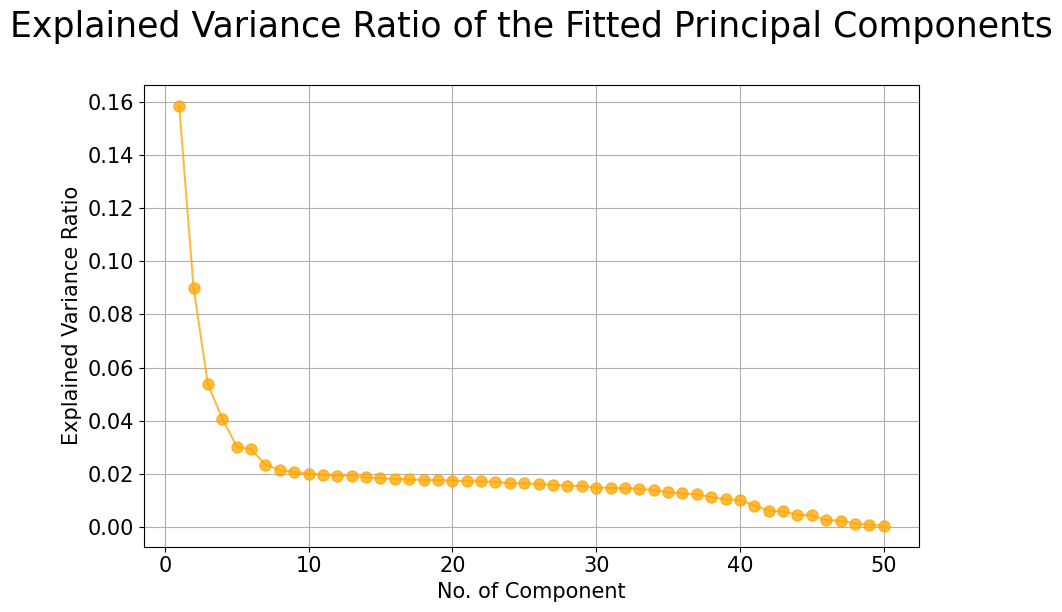


Bedroom

Transformed DataFrame after PCA:
             RXPACC       FP_AMP3         RANGE       CIR_PWR       FP_AMP2  \
count  3.310000e+03  3.310000e+03  3.310000e+03  3.310000e+03  3.310000e+03   
mean  -1.406059e-16  5.366637e-18 -6.600963e-17  1.524125e-16 -1.223593e-16   
std    1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00   
min   -1.358770e+00 -2.043496e+00 -1.602020e+00 -2.352348e+00 -2.078786e+00   
25%   -8.681096e-01 -8.719633e-01 -8.724272e-01 -5.536625e-01 -8.928439e-01   
50%   -4.500121e-01  1.067440e-01 -1.686812e-01 -2.523206e-02  2.643206e-01   
75%    9.355840e-01  8.216557e-01  6.760489e-01  5.125677e-01  8.828771e-01   
max    1.633565e+00  1.912596e+00  3.341824e+00  3.202021e+00  1.400796e+00   

          MAX_NOISE       FP_AMP1        CIR741        CIR742        FP_IDX  \
count  3.310000e+03  3.310000e+03  3.310000e+03  3.310000e+03  3.310000e+03   
mean   1.776357e-16  4.883640e-17  3.005317e-17 -2.790651e-17 -2.132058e-14   
std    1

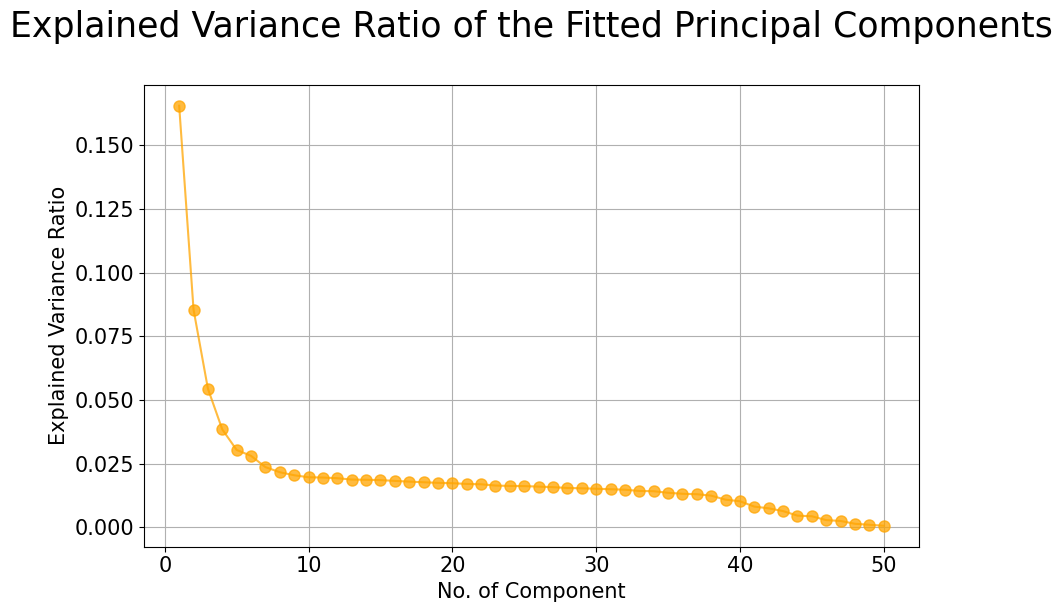


Boiler Room

Transformed DataFrame after PCA:
             RXPACC       FP_AMP3       CIR_PWR         RANGE       FP_AMP2  \
count  3.096000e+03  3.096000e+03  3.096000e+03  3.096000e+03  3.096000e+03   
mean   4.590069e-18 -1.239319e-16  1.927829e-16  1.199156e-16  1.468822e-16   
std    1.000162e+00  1.000162e+00  1.000162e+00  1.000162e+00  1.000162e+00   
min   -1.031718e+00 -1.966627e+00 -2.441422e+00 -1.611516e+00 -2.083455e+00   
25%   -8.682826e-01 -8.860778e-01 -5.384383e-01 -8.641908e-01 -9.113487e-01   
50%   -4.419294e-01  1.346047e-01  9.257234e-03 -1.470374e-01  3.186042e-01   
75%    8.087065e-01  8.055414e-01  5.095800e-01  6.861603e-01  8.632952e-01   
max    1.728919e+00  1.912873e+00  3.286288e+00  3.452655e+00  1.386858e+00   

          MAX_NOISE       FP_AMP1        CIR741        CIR574        CIR742  \
count  3.096000e+03  3.096000e+03  3.096000e+03  3.096000e+03  3.096000e+03   
mean  -7.114607e-17 -8.491628e-17  5.049076e-17 -1.032766e-16 -7.516239e-17   
std 

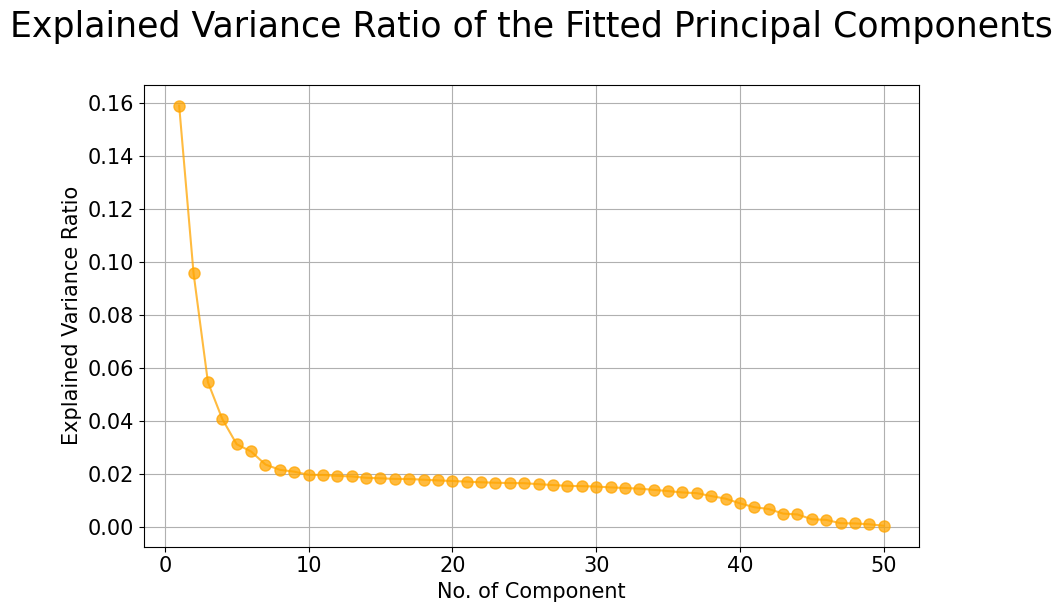

In [ ]:
#Standardize the Data
dfx = {}

for idx, each_df in enumerate(df_array):
    print(f"\n{dataset_names[idx]}")

    X = each_df.drop('NLOS',axis=1)
    y = each_df['NLOS']

    #Training and Test data Spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    #Standardize the Data
    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train)

    #Store standardized data
    dfx[dataset_names[idx]] = pd.DataFrame(data=X_train_scaled ,columns=X.columns)
    
    print("\nTransformed DataFrame after PCA:")
    print(dfx[dataset_names[idx]].describe())

    #Apply PCA
    pca = PCA(n_components=None)
    X_train_pca = pca.fit_transform(X_train_scaled)

    #Plot 
    plt.figure(figsize=(10, 6))
    plt.plot([i+1 for i in range(len(pca.explained_variance_ratio_))],
             pca.explained_variance_ratio_,
             marker='o', linestyle='-', color='orange', markersize=8, alpha=0.75)
    plt.grid(True)
    plt.title("Explained Variance Ratio of the Fitted Principal Components\n", fontsize=25)
    plt.yticks(fontsize=15)
    plt.ylabel("Explained Variance Ratio", fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("No. of Component", fontsize=15)

    plt.show()

    #Find minimum number of components that explain 95% of variance
    # explained_variance = np.cumsum(pca.explained_variance_ratio_)
    # n_components = 

    # 0.001 is added to avoid floating point error
